# Week3 - Homework

Write a rule based predictor for a given matrix

* Don't use a machine learning model (You can use PCA)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [2]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

---
# Data Analysis

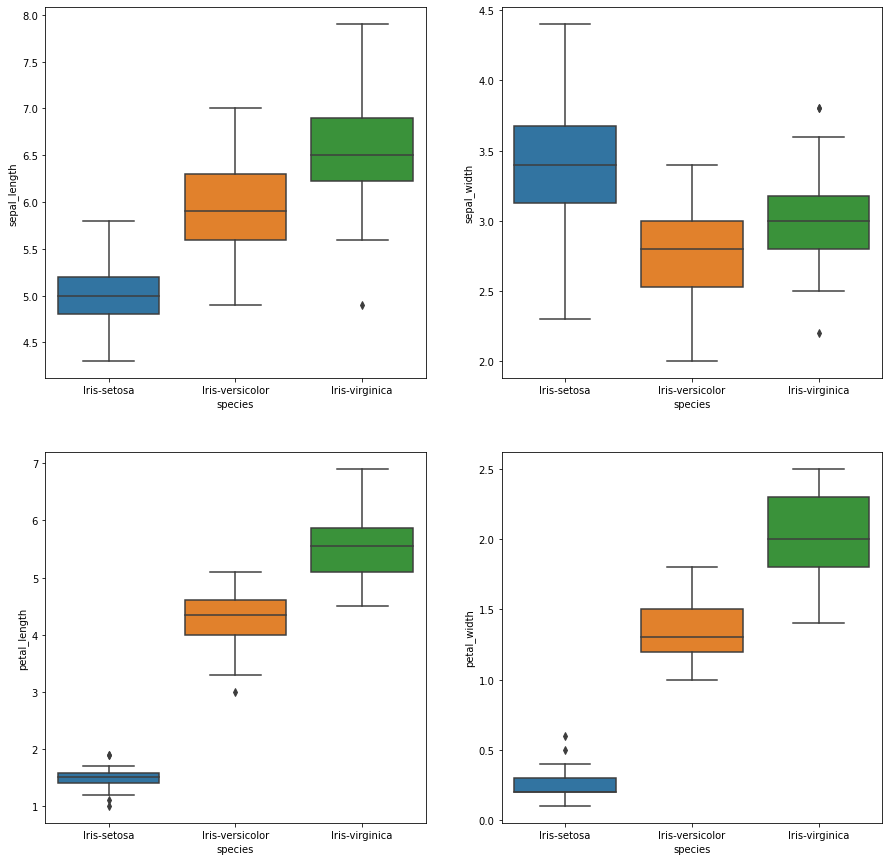

In [3]:
columns = df.columns[:-1].to_list()

f, ax = plt.subplots(2, 2, figsize = (15, 15))
axx = ax.flatten()

for index, col in enumerate(columns):
    sns.boxplot(data = df, x = 'species', y = col, ax = axx[index])

In [4]:
df[ df['species'] == 'Iris-setosa']['petal_width'].max()

0.6

In [5]:
df[ df['species'] == 'Iris-versicolor']['petal_width'].min()

1.0

In [6]:
df[ df['species'] == 'Iris-virginica']['petal_width'].min()

1.4

In [7]:
df[ df['species'] == 'Iris-versicolor']['petal_width'].max()

1.8

**All the samples with petal width of below 0.6 are Iris-setosa**

**All the samples with petal width greater than 1 and less than 1.8 are Iris-Versicolor**

**All the samples with petal length greater than 1.8 are Iris-Virginica**

In [8]:
data = df[ df['species'] != 'Iris-setosa'].copy()

In [9]:
data.shape

(100, 5)

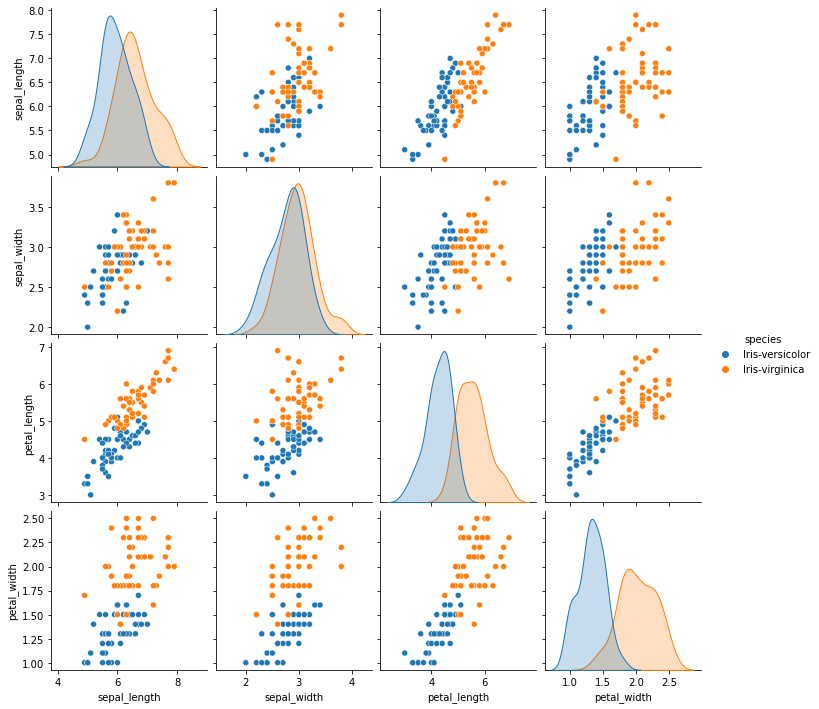

In [10]:
sns.pairplot(data = data, hue = 'species')

**Samples with petal-width greater than 1.7**

In [11]:
def predict_one(sepal_length, sepal_width, petal_length, petal_width):
    # your code
    if petal_width < 0.7:
        return 'Iris-setosa'
    
    elif petal_width >= 0.9 and petal_width < 1.4:
        return 'Iris-versicolor'
    
    elif petal_width > 1.7:
        return 'Iris-virginica'
    
    return 'Iris-versicolor'

In [12]:
predictions = pd.Series([ predict_one(*line) for line in df.iloc[:, :4].to_numpy()])
accuracy = sum(df.species == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.96
